In [ ]:
!pip install yfinance

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

Prepare the Training Data

In [3]:
forex_data_1 = yf.download('EURUSD=X', start='2020-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
#Removing unnecessary columns
df=forex_data_1.drop(['Open', 'High', 'Low', 'Close', 'Volume'],axis=1) 
df.rename(columns={'Adj Close': 'eur'},inplace=True) 
df.head(2)

,eur
Date,
2020-01-01,1.122083
2020-01-02,1.122083


In [5]:
df = df.dropna(axis=0)

In [6]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train = ss.fit_transform(np.array(df["eur"]).reshape(-1,1))

In [7]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train)):
    xtrain.append(train[i-60:i,0])
    ytrain.append(train[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [8]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

### Build a GRU Model

In [9]:
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Dense
from keras.layers import Dropout

In [24]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 

In [ ]:
#initialisizng the model 
regression= Sequential()

#First Input layer and CNN layer
regression.add(Conv1D(64,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(MaxPooling1D(pool_size=2))
regression.add(Flatten())
regression.add(Dense(50, activation='relu'))
regression.add(Dense(1))
regression.compile(optimizer='adam', loss='mse')


#fitting the network
model = regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Prepare the testing data

In [ ]:
#regression.save('model.h5')

In [16]:
test_df = yf.download('EURUSD=X', start='2022-01-01', end='2022-06-30')

[*********************100%***********************]  1 of 1 completed


In [17]:
test = pd.DataFrame()
test['eur'] = test_df['Adj Close']
test = test.dropna()
total= pd.concat([df['eur'],test['eur']],axis=0) 
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction
xtest= np.array(xtest)
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))


In [26]:

predicted_value= regression.predict(xtest)

In [27]:
len(predicted_value[0])

1

In [28]:
predicted_value= ss.inverse_transform(predicted_value)

In [29]:
test_actual = np.array(test['eur'][0:20])

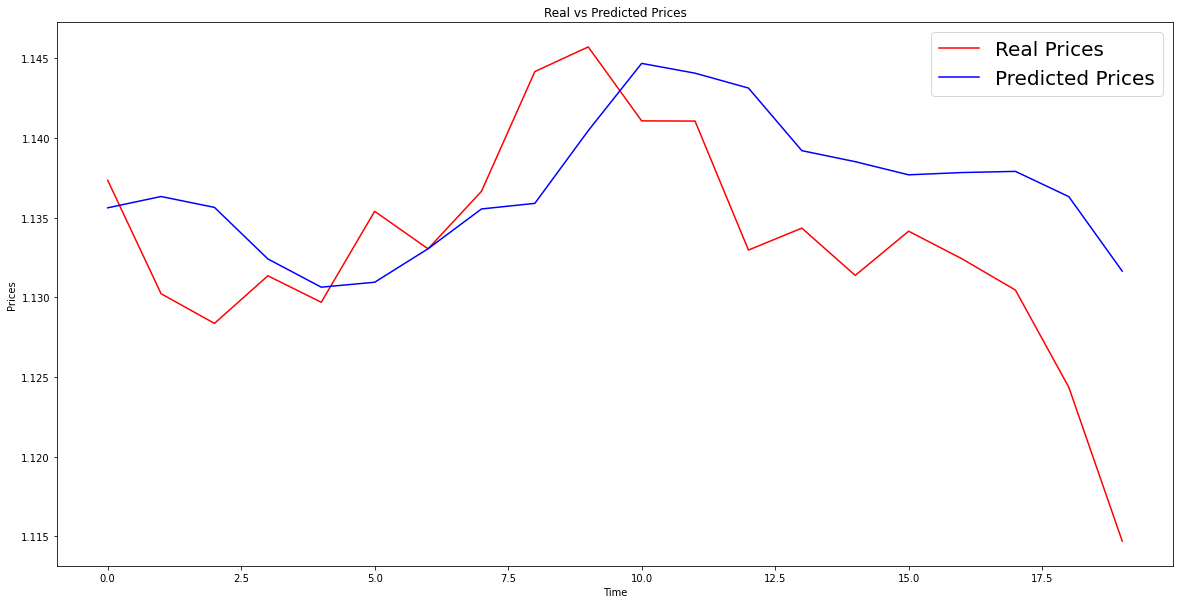

In [30]:
plt.figure(figsize=(20,10))
plt.plot(test_actual,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [31]:
from sklearn.metrics import r2_score
r2_score(test_actual, predicted_value)

-0.026375009763236035

Hyperparameter Tuning

In [ ]:
regression= Sequential()

regression.add(Conv1D(16,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(MaxPooling1D(pool_size=2))

regression.add(Conv1D(32,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(MaxPooling1D(pool_size=2))

regression.add(Conv1D(64,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(MaxPooling1D(pool_size=2))

regression.add(Conv1D(32,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(MaxPooling1D(pool_size=2))

regression.add(Conv1D(16,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(MaxPooling1D(pool_size=2))
regression.add(Flatten())

regression.add(Dense(50, activation='relu'))
regression.add(Dense(1))
regression.compile(optimizer='adam', loss='mse')


#fitting the network
model = regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

In [35]:
predicted_value= regression.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value)
test_actual = np.array(test['eur'][0:20])
r2_score(test_actual, predicted_value)

-32.07044449569107

In [ ]:
regression= Sequential()

regression.add(Conv1D(16,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(32,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(64,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(128,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(256,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(128,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(64,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(32,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(16,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Flatten())

regression.add(Dense(50, activation='relu'))
regression.add(Dense(1))
regression.compile(optimizer='adam', loss='mse')


#fitting the network
model = regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

In [48]:
predicted_value= regression.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value)
test_actual = np.array(test['eur'][0:20])
r2_score(test_actual, predicted_value)

0.23856412176724007

In [ ]:
regression= Sequential()
regression.add(Conv1D(16,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(32,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(64,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(32,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Conv1D(16,kernel_size=1,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Flatten())

regression.add(Dense(50, activation='relu'))
regression.add(Dense(1))
regression.compile(optimizer='adam', loss='mse')


#fitting the network
model = regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

In [52]:
predicted_value= regression.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value)
test_actual = np.array(test['eur'][0:20])
r2_score(test_actual, predicted_value)

0.17632793045760775